In [1]:
import numpy as np  # To load numpy
import pandas as pd # To load pandas
from sklearn.model_selection import train_test_split  # for split arrays or matrices into random train and test subsets
from sklearn import metrics   # importing metrics from sklearn to findout the performance measures.
import sklearn.preprocessing as preprocessing
import time
from sklearn import datasets
%matplotlib inline
import sklearn.preprocessing as preprocessing #Importing preprocess algorithm
from sklearn.svm import SVC

In [2]:
#Download the data fro "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv"
#Load the dataset 
bcd = datasets.load_breast_cancer()
print(bcd.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
bcd

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# For easy  manipulation, convert dataset to pandas dataframe
bcdf = pd.DataFrame(bcd.data, columns= bcd.feature_names)

In [5]:
bcdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# Append dataframe containing tumor features with diagnostic outcomes.
bcdf['Diagnosis'] = bcd.target

In [7]:
bcdf["Diagnosis"]=bcdf["Diagnosis"].replace({0: 6})

In [8]:
# Quick check on dataset
bcdf.head(30)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,6
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,6
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,6
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,6
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,6
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,6
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,6
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,6
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,6
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,6


In [9]:
# Quick glimpse of tumor features in relation to diagnosis
bcdf.groupby('Diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
6,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [10]:
# For differential diagnosis visual comparisons.
# create to dataframes - one for positive, zero for negative
# 0 - bening(Benign refers to a condition, tumor, or growth that is not cancerous)
# 1 - malignant(Malignant refers to cancer cells that can invade and kill nearby tissue and spread to other parts of your body)
bcdf.head()
bcdf_b = bcdf[bcdf['Diagnosis'] == 6]
bcdf_m = bcdf[bcdf['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(bcdf.columns[0:10])

In [11]:
bcdf_b.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,6
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,6
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,6
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,6
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,6


In [12]:
bcdf_m.head(25)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409,1
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,1
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917,1
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563,1
51,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025,1
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,...,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408,1


In [13]:
corr = bcdf.corr() #correlation plot
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [14]:
corr.shape

(31, 31)

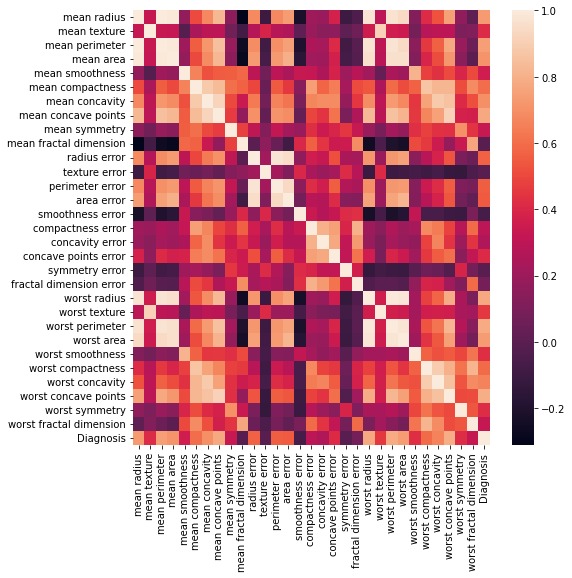

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(corr);

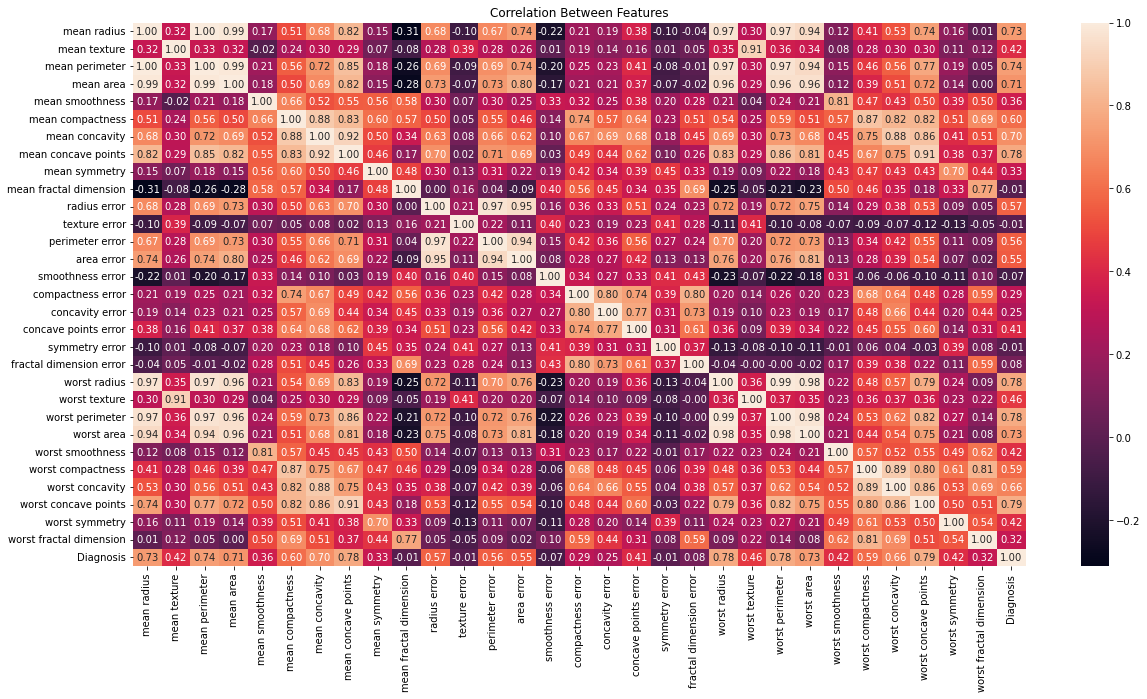

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, fmt =".2f")
plt.title("Correlation Between Features")
plt.show()

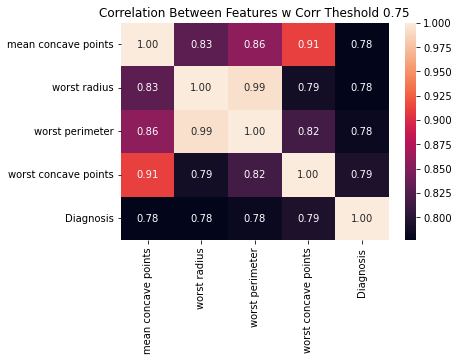

In [17]:
threshold = 0.75 
filtre = np.abs(corr["Diagnosis"]) > threshold 
corr_features = corr.columns[filtre].tolist()
sns.heatmap(bcdf[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

In [18]:
# Split data into testing and training set. Use 80% for training
x_train, x_test, y_train, y_test = train_test_split(bcdf.iloc[:,1:30], bcdf['Diagnosis'],train_size = 0.8 )

print('x_train_proper: ',(x_train.shape))
print('y_train_proper: ',(y_train.shape))
print('x_test:  ',(x_test.shape))
print('y_test:  ',(y_test.shape))
print("Training Proper Size:", len(x_train))
print("Test Set Size:",len(x_test))

x_train_proper:  (455, 29)
y_train_proper:  (455,)
x_test:   (114, 29)
y_test:   (114,)
Training Proper Size: 455
Test Set Size: 114


In [19]:
#Initialize the variables
def set_variables(x_test):
    pred=np.zeros(len(x_test))
    conf=np.zeros(len(x_test))
    cred=np.zeros(len(x_test))
    sum_p_values=0
    return  pred, conf, cred, sum_p_values

In [20]:
svc_linear=SVC(kernel='linear')
abc = svc_linear.fit(x_train,y_train)

In [21]:
abc.score(x_test,y_test)

0.956140350877193

In [22]:
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(bcdf.iloc[:,1:30], bcdf['Diagnosis'],train_size = 0.8 )
print (n_y_test)

146    6
524    1
57     6
561    1
37     1
      ..
434    1
197    6
179    1
304    1
540    1
Name: Diagnosis, Length: 114, dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(n_x_train)
X_train_scaled = scaler.transform(n_x_train)
X_test_scaled = scaler.transform(n_x_test)
print (X_train_scaled)
print (X_test_scaled)

[[ 1.80306078  0.00820603 -0.02797985 ... -0.90597363 -0.90512491
  -1.12453298]
 [-1.01190679  0.18112176  0.08876691 ... -0.010748   -0.35542176
  -0.07222021]
 [-0.38869258  1.30301548  1.2021533  ...  1.85487372  1.42510363
   0.45829899]
 ...
 [ 0.14582448 -0.47842823 -0.5281596  ... -0.59347062 -0.36022966
  -0.36831043]
 [ 0.44459384 -0.6447567  -0.63546361 ... -0.49677959  0.26479726
  -0.60855651]
 [ 0.13882208 -1.04287458 -0.91044802 ... -0.72820155 -0.0429083
  -0.37761778]]
[[-6.26774412e-01 -5.37713625e-01 -6.40614205e-01 ...  1.07740505e+00
   4.59030401e+00  1.10690526e+00]
 [-8.36846618e-01 -1.19602851e+00 -1.03778211e+00 ... -7.59724645e-01
  -6.53511514e-01  4.72260025e-01]
 [ 5.42627540e-01  1.44068390e-01  2.92370013e-03 ...  1.03042351e+00
   1.26323768e+00  1.47919944e+00]
 ...
 [-1.44839015e+00 -4.43021679e-01 -4.20855596e-01 ... -1.14436704e+00
  -1.80580472e+00 -6.27171223e-01]
 [-2.57980982e-01 -7.60033848e-01 -7.23309828e-01 ... -9.14157507e-01
  -1.12468565e

In [24]:
def svc_linear_cp(ox_train,oy_train,ox_test,oy_test):
    p_values = []
    aug_train_y=[]
    #Loop through test samples
    for i in range(len(ox_test)):
        #Create new dataset which is the training set + the test sample
        aug_train_x=ox_train
        aug_train_y=oy_train.tolist()
        aug_train_x = np.vstack([aug_train_x, ox_test[i]])
        aug_train_y=  np.append(aug_train_y,oy_test.iloc[i])
        svc_linear.fit(aug_train_x,aug_train_y)
        ncp_score =svc_linear.score(aug_train_x,aug_train_y) 
        p_values.insert(i,ncp_score)
    return p_values                                                                               

In [25]:
#Calculate p-values using linear kernel 
p_values =svc_linear_cp(X_train_scaled,n_y_train,X_test_scaled,n_y_test)

In [26]:
#Use p-values of test sample to calculate various measures
pred, conf, cred, sum_p_values = \
    set_variables(X_test_scaled)
for i in range(len(p_values)):
    pred[i]= int(np.argmax(p_values[i]))
    conf[i]= 1 - p_values[i]
    cred[i]= np.max(p_values[i])
    sum_p_values = sum_p_values + np.sum(p_values[i])
false_p_value=sum_p_values/(2*len(X_test_scaled))
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))
print("Linear SVM Accuracy: ", np.mean(p_values))
print("Linear SVM Avg False p-value: ", false_p_value)
print("Linear Avg Credibility: ",np.mean(cred))

--- 0.0 seconds ---
Linear SVM Accuracy:  0.9889966143428746
Linear SVM Avg False p-value:  0.4944983071714385
Linear Avg Credibility:  0.9889966143428746
